### IMPORT LIBRARIES

In [3]:
from pathlib import Path 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [4]:
DATA_PATH = Path("data") 

In [5]:
df=pd.read_csv("credit_train.csv")

In [6]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Number of Records
print(f"Number of rows in the dataset:{df.shape[0]}")
print(f"Number of columns in the dataset:{df.shape[1]}")

Number of rows in the dataset:100514
Number of columns in the dataset:19


In [8]:
df.replace('na', np.nan, inplace = True) 
df.replace('null', np.nan, inplace = True) 
df.replace('NA', np.nan, inplace = True) 
df.replace('NULL', np.nan, inplace = True) 
df.replace('Null', np.nan, inplace = True)  
df.replace('NaN', np.nan, inplace = True) 

In [9]:
new_df_filter = df.dropna(axis = 'index', how = 'any')
new_df_filter

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [10]:
new_df_filter.isnull()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99993,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
new_df_filter.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [12]:
new_df_filter.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,3.642300e+04,36423.000000,3.642300e+04,36423.000000,36423.000000,36423.000000,36423.000000,36423.000000,3.642300e+04,3.642300e+04,36423.000000,36423.000000
mean,1.377581e+07,1055.688905,1.464561e+06,19269.251544,19.065000,34.851358,11.490816,0.186036,2.636261e+05,6.651413e+05,0.114790,0.038575
std,3.406789e+07,1438.252560,9.357681e+05,12100.926465,6.654911,21.916600,4.991626,0.528248,3.176197e+05,5.703167e+06,0.359648,0.298938
min,2.145000e+04,585.000000,1.112450e+05,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.907840e+05,702.000000,9.309050e+05,11125.735000,14.500000,16.000000,8.000000,0.000000,1.010515e+05,2.472910e+05,0.000000,0.000000
50%,3.247200e+05,721.000000,1.260498e+06,17117.480000,17.700000,31.000000,11.000000,0.000000,1.869600e+05,4.214760e+05,0.000000,0.000000
75%,5.421900e+05,738.000000,1.742766e+06,24766.120000,22.400000,51.000000,14.000000,0.000000,3.284340e+05,7.029660e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.083900e+07,229057.920000,70.500000,176.000000,48.000000,15.000000,7.350321e+06,7.982554e+08,7.000000,15.000000


In [13]:
# Replace specific values (e.g., 999) with NaN
new_df_filter.replace(99999999.0,np.nan, inplace=True)

# Perform mean imputation
new_df_filter = new_df_filter.fillna(new_df_filter.mean())
new_df_filter

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,316018.694493,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.000000,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.000000,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,316018.694493,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,316018.694493,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,316018.694493,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.000000,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.000000,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,316018.694493,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [14]:
# Define a function to perform range normalization
def range_normalization(x):
    return (x - x.min()) / (x.max() - x.min())

# Apply the range normalization function to all columns except the non-numeric ones
new_df_filter[new_df_filter.select_dtypes(include=['float64', 'int64']).columns] = new_df_filter[new_df_filter.select_dtypes(include=['float64', 'int64']).columns].apply(range_normalization)

new_df_filter


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,0.383653,Short Term,0.022527,0.069014,8 years,Own Home,Debt Consolidation,0.127481,0.166417,0.164773,0.361702,0.066667,0.040542,0.000940,0.000000,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,0.255530,Short Term,0.020939,0.034918,< 1 year,Home Mortgage,Debt Consolidation,0.047390,0.236882,0.056818,0.255319,0.066667,0.016621,0.000341,0.142857,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,0.686762,Short Term,0.013430,0.079663,2 years,Rent,Debt Consolidation,0.081465,0.281859,0.187500,0.063830,0.000000,0.059476,0.000695,0.000000,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,0.383653,Short Term,0.020650,0.019636,3 years,Rent,Debt Consolidation,0.051738,0.182909,0.431818,0.319149,0.000000,0.027749,0.000363,0.000000,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,0.383653,Short Term,0.022383,0.021640,< 1 year,Own Home,Debt Consolidation,0.050547,0.070465,0.142045,0.106383,0.000000,0.018242,0.000276,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,0.383653,Short Term,0.022671,0.035108,< 1 year,Rent,other,0.052257,0.244378,0.090909,0.170213,0.000000,0.005087,0.000168,0.000000,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,0.030000,Short Term,0.019061,0.033884,10+ years,Home Mortgage,small_business,0.027419,0.257871,0.068182,0.106383,0.000000,0.130869,0.000000,0.000000,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,0.246332,Short Term,0.019350,0.021874,1 year,Home Mortgage,Other,0.016274,0.203898,0.102273,0.106383,0.000000,0.000062,0.000325,0.000000,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,0.383653,Short Term,0.021227,0.038342,1 year,Rent,Debt Consolidation,0.057230,0.083958,0.119318,0.446809,0.000000,0.020822,0.000638,0.000000,0.0


In [15]:
new_df_filter.shape

(36423, 19)

In [16]:
# begin encoding
# get info about all the datatypes
new_df_filter.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [17]:
# drop the id columns
new_df_filter.drop(columns=['Loan ID'], inplace=True)
new_df_filter.drop(columns=['Customer ID'], inplace=True)

# Select the categorical columns
cat_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# encode the categorical columns
new_df_filter = pd.get_dummies(new_df_filter, columns=cat_cols)
# Print the modified dataset
print(new_df_filter)

      Loan Status  Current Loan Amount  Credit Score  Annual Income  \
2      Fully Paid             0.383653      0.022527       0.069014   
6      Fully Paid             0.255530      0.020939       0.034918   
8      Fully Paid             0.686762      0.013430       0.079663   
10     Fully Paid             0.383653      0.020650       0.019636   
12     Fully Paid             0.383653      0.022383       0.021640   
...           ...                  ...           ...            ...   
99990  Fully Paid             0.383653      0.022671       0.035108   
99993  Fully Paid             0.030000      0.019061       0.033884   
99994  Fully Paid             0.246332      0.019350       0.021874   
99996  Fully Paid             0.383653      0.021227       0.038342   
99997  Fully Paid             0.106390      0.022671       0.033823   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
2          0.127481                 0.166417                      0.1

In [18]:
# separate x and y
# separate x and y
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
new_df_filter.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in new_df_filter.columns.values]
target_column = "Loan Status"
y = new_df_filter[target_column]
X = new_df_filter.drop(target_column, axis=1)

In [19]:
new_df_filter['Loan Status'].value_counts()[1]

7451

In [20]:
new_df_filter['Loan Status'].value_counts()[0]

28972

In [21]:
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,0.383653,0.022527,0.069014,0.127481,0.166417,0.164773,0.361702,0.066667,0.040542,0.000940,...,0,0,0,0,0,0,0,0,0,0
6,0.255530,0.020939,0.034918,0.047390,0.236882,0.056818,0.255319,0.066667,0.016621,0.000341,...,0,0,0,0,0,0,0,0,0,0
8,0.686762,0.013430,0.079663,0.081465,0.281859,0.187500,0.063830,0.000000,0.059476,0.000695,...,0,0,0,0,0,0,0,0,0,0
10,0.383653,0.020650,0.019636,0.051738,0.182909,0.431818,0.319149,0.000000,0.027749,0.000363,...,0,0,0,0,0,0,0,0,0,0
12,0.383653,0.022383,0.021640,0.050547,0.070465,0.142045,0.106383,0.000000,0.018242,0.000276,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0.383653,0.022671,0.035108,0.052257,0.244378,0.090909,0.170213,0.000000,0.005087,0.000168,...,0,0,0,0,0,1,0,0,0,0
99993,0.030000,0.019061,0.033884,0.027419,0.257871,0.068182,0.106383,0.000000,0.130869,0.000000,...,0,0,0,0,0,0,0,1,0,0
99994,0.246332,0.019350,0.021874,0.016274,0.203898,0.102273,0.106383,0.000000,0.000062,0.000325,...,0,1,0,0,0,0,0,0,0,0
99996,0.383653,0.021227,0.038342,0.057230,0.083958,0.119318,0.446809,0.000000,0.020822,0.000638,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y

2        Fully Paid
6        Fully Paid
8        Fully Paid
10       Fully Paid
12       Fully Paid
            ...    
99990    Fully Paid
99993    Fully Paid
99994    Fully Paid
99996    Fully Paid
99997    Fully Paid
Name: Loan Status, Length: 36423, dtype: object

In [23]:
# encode y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# begin oversampling according to target feature
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
# Count the number of samples in each class
class_counts = np.bincount(y)

# Find the minority class with the lowest count
minority_class = np.argmin(class_counts)

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.383653,0.022527,0.069014,0.127481,0.166417,0.164773,0.361702,0.066667,0.040542,0.000940,...,0,0,0,0,0,0,0,0,0,0
1,0.255530,0.020939,0.034918,0.047390,0.236882,0.056818,0.255319,0.066667,0.016621,0.000341,...,0,0,0,0,0,0,0,0,0,0
2,0.686762,0.013430,0.079663,0.081465,0.281859,0.187500,0.063830,0.000000,0.059476,0.000695,...,0,0,0,0,0,0,0,0,0,0
3,0.383653,0.020650,0.019636,0.051738,0.182909,0.431818,0.319149,0.000000,0.027749,0.000363,...,0,0,0,0,0,0,0,0,0,0
4,0.383653,0.022383,0.021640,0.050547,0.070465,0.142045,0.106383,0.000000,0.018242,0.000276,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57939,0.201505,0.022093,0.036719,0.057314,0.414333,0.252800,0.202086,0.000000,0.017790,0.000281,...,0,0,0,0,0,0,0,0,0,0
57940,0.287392,0.016254,0.022425,0.073066,0.229667,0.274865,0.198146,0.000000,0.028193,0.000440,...,0,0,0,0,0,0,0,0,0,0
57941,0.422077,0.896429,0.040733,0.084633,0.215802,0.125685,0.191489,0.000000,0.024141,0.000285,...,0,0,0,0,0,0,0,0,0,0
57942,0.538592,0.013667,0.044106,0.159108,0.126670,0.393687,0.231680,0.000000,0.014285,0.000279,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# splitting
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and temporary sets (60% for training and 40% for temporary)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the temporary set into validation and testing sets (50% for each)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)


In [26]:
# logistic modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("LR Accuracy:", accuracy)

LR Accuracy: 0.6666666666666666


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[2786 2979]
 [ 884 4940]]


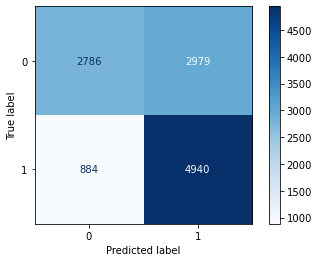

In [28]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
display.plot(cmap=plt.cm.Blues)

In [29]:
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, log_loss,recall_score
# calculate the precision of the model
precision = precision_score(y_val, y_pred, average='macro')
# calculate the F1 score of the model
f1 = f1_score(y_val, y_pred, average='macro')
# calculate the ROC curve and AUC of the model
y_prob = lr.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_prob[:, 1],pos_label=1)
roc_auc = auc(fpr, tpr)
# calculate the log loss of the model
logloss = log_loss(y_val, y_prob)
# Calculate the recall score
recall = recall_score(y_val, y_pred)
# Calculate the precision score
precision = precision_score(y_val, y_pred)

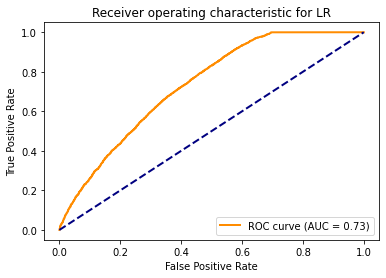

In [30]:
# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for LR')
plt.legend(loc="lower right")
plt.show()

In [31]:
print("LR F1 Score: ",f1)
print("LR AUC: ", roc_auc)
print("LR Log Loss: ", logloss)
print("LR Recall:", recall)
print("LR Precision: ", precision)

LR F1 Score:  0.6547392417264138
LR AUC:  0.7317406872182457
LR Log Loss:  0.5599022997357341
LR Recall: 0.8482142857142857
LR Precision:  0.6238161384013133


In [32]:
from sklearn.metrics import classification_report
print("               LR classification report")
print(classification_report(y_val, y_pred))

               LR classification report
              precision    recall  f1-score   support

           0       0.76      0.48      0.59      5765
           1       0.62      0.85      0.72      5824

    accuracy                           0.67     11589
   macro avg       0.69      0.67      0.65     11589
weighted avg       0.69      0.67      0.66     11589



In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', None]}
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_ )

/Users/charlottezhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/charlottezhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best Parameters:  {'C': 1, 'penalty': 'l2'}
Best Score:  0.6737620287181516


In [34]:
# logistic modeling
lr_tunned = LogisticRegression(penalty="l2", C=10, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=1000)
lr_tunned.fit(X_train , y_train)
y_pred_tunned = lr_tunned.predict(X_test)
accuracy_tunned = accuracy_score(y_test, y_pred_tunned)
print("Tuned LR Accuracy:", accuracy_tunned)

Tuned LR Accuracy: 0.6705496591595479


In [35]:
cm_tunned = confusion_matrix(y_test, y_pred_tunned)
print(cm_tunned)

[[2921 2886]
 [ 932 4850]]


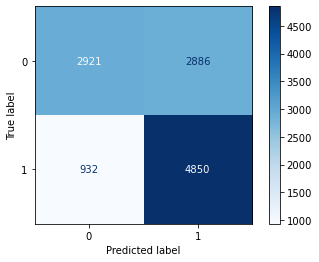

In [36]:
display = ConfusionMatrixDisplay(confusion_matrix=cm_tunned, display_labels=None)
display.plot(cmap=plt.cm.Blues)

In [37]:
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, log_loss,recall_score
# calculate the precision of the model
precision_tunned = precision_score(y_test, y_pred_tunned, average='macro')
# calculate the F1 score of the model
f1_tunned = f1_score(y_test, y_pred_tunned, average='macro')
# calculate the ROC curve and AUC of the model
y_prob_tunned = lr_tunned.predict_proba(X_test)
fpr_tunned, tpr_tunned, thresholds_tunned = roc_curve(y_test, y_prob_tunned[:, 1],pos_label=1)
roc_auc_tunned = auc(fpr_tunned, tpr_tunned)
# calculate the log loss of the model
logloss_tunned = log_loss(y_test, y_prob_tunned)
# Calculate the recall score
recall_tunned = recall_score(y_test, y_pred_tunned)
# Calculate the precision score
precision_tunned = precision_score(y_test, y_pred_tunned)

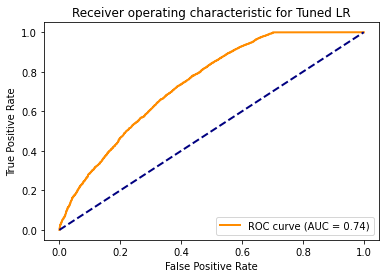

In [38]:
# plot the ROC curve
plt.plot(fpr_tunned, tpr_tunned, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_tunned))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Tuned LR')
plt.legend(loc="lower right")
plt.show()

In [39]:
print("Tuned LR F1 Score: ",f1_tunned)
print("Tuned LR AUC: ", roc_auc_tunned)
print("Tuned LR Log Loss: ", logloss_tunned)
print("Tuned LR Recall: ", recall_tunned)
print("Tuned LR Precision: ", precision_tunned)

Tuned LR F1 Score:  0.6611618371272165
Tuned LR AUC:  0.7396117247061107
Tuned LR Log Loss:  0.5562234393309882
Tuned LR Recall:  0.838810100311311
Tuned LR Precision:  0.6269389865563598


In [40]:
from sklearn.metrics import classification_report
print("               Tuned LR classification report")
print(classification_report(y_test, y_pred_tunned))

               Tuned LR classification report
              precision    recall  f1-score   support

           0       0.76      0.50      0.60      5807
           1       0.63      0.84      0.72      5782

    accuracy                           0.67     11589
   macro avg       0.69      0.67      0.66     11589
weighted avg       0.69      0.67      0.66     11589

